## **1. Importing Libraries**
### **--->** Essential python libraries for data analytics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## **2. Load The Dataset**
#### **--->** Import songs dataset from a CSV file into a pandas DataFrame.

In [ ]:
df = pd.read_csv('/content/songs.csv')

## **3. Data Overview and Summary**
###  **---> 3.1) Check the first few rows**


In [ ]:
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


### **---> 3.2) Check the dimension of the data**

In [ ]:
df.shape

(41355, 6)

### **---> 3.3) Check column names and data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41355 entries, 0 to 41354
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       41355 non-null  object
 1   singer     41355 non-null  object
 2   singer_id  41355 non-null  object
 3   duration   41355 non-null  object
 4   link       41355 non-null  object
 5   language   41355 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


### **---> 3.4) Check descriptive statistics in a dataframe**


In [ ]:
df.describe()

,name,singer,singer_id,duration,link,language
count,41355,41355,41355,41355,41355,41355
unique,31534,6196,6580,1309,36361,16
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,03:02,/kya-khoob-lagti-ho,Telugu
freq,26,1410,1410,447,2,4996


## **4. Exploratory Data Analysis(EDA)**


* **'EDA'** is the art of unveiling **insights**, **patterns**, and anomalies within datasets.The general steps are:
  * 	**Data Cleaning & Preprocessing**
  * 	**Statistical Analysis**
  * 	**Univariate Analysis & Visualization**
  * 	**Bivariate Analysis & Visualization**
  * 	**Interpretation of Results**

            Let's go through each step in detail.










### **---> 4.1) Data Cleaning and Preprocessing**
  * 	**Check for missing values in each column**



In [ ]:
df.isnull().sum()

,0
name,0
singer,0
singer_id,0
duration,0
link,0
language,0


In [ ]:
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


  * **Check for duplicates in a dataset or columns**

In [ ]:
df.duplicated().sum()

1

* **It's one of the approach to finding duplicate values**

In [ ]:
len(df['link']) - df['link'].nunique()

4994

In [ ]:
df['link'].duplicated().sum()

4994

* **Remove duplicated rows**

In [ ]:
df.drop_duplicates(subset = ['link'], inplace = True)

In [ ]:
df['link'].duplicated().sum()

0

##  **5. Data Transformation And Analysis**

* **It filters the DataFrame to select only rows where the 'language' column is 'Urdu'.**

In [ ]:
df[df['language'] == 'Urdu']

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
3111,Salam,Farhat Shuja,/artist/farhat-shuja,10:04,/salam-44,Urdu
3112,Thumri Tilang - Sajia Akeli Dukh De,Badar Uz Zaman|Qamar Uz Zaman,/artist/badar-uz-zaman-1|/artist/qamar-uz-zaman-1,06:11,/thumri-tilang-sajia-akeli-dukh-de,Urdu
3113,Sanwar Sanwar Kar,Mumtaz Shirazi,/artist/mumtaz-shirazi,04:45,/sanwar-sanwar-kar,Urdu
3114,Jo Teri Sana Mein,Muzaffar Warisi,/artist/muzaffar-warisi,06:16,/jo-teri-sana-mein,Urdu


* **It counts the number of rows in the DataFrame where the 'language' column is 'Urdu'.**

In [ ]:
(df['language'] == 'Urdu').sum()

3116

**Using for loop:**
* Initializing a counter variable (count) to 0.
* Looping through each value in the 'language' column.
* If the current value is "Telugu", it increments the counter.

In [ ]:
count = 0
for i in df['language']:

  if i == 'Telugu':
    count += 1

print(count)

4995


**Using Nested loop:**

* Calculating the frequency of each language in the dataset. It does this using two nested loops: the outer loop iterates through unique languages, while the inner loop counts of each language within the entire column.

In [ ]:
for language in df['language'].unique():
  count = 0

  for i in df['language']:

    if language == i:
      count += 1

  print(language,count)

Urdu 3116
Gujarati 2115
Tamil 4677
Kannada 3559
Rajasthani 541
Haryanvi 228
Punjabi 3818
Hindi 4993
Malayalam 479
Marathi 4699
Telugu 4995
Odia 940
Bhojpuri 519
Assamese 724
Bengali 958


**Using Inbuilt function:**
* It shows all the unique languages and frequency how many times language appears in a dataset it will counts automatically by using inbuilt function.

In [ ]:
df['language'].value_counts()

,count
language,
Telugu,4995
Hindi,4993
Marathi,4699
Tamil,4677
Punjabi,3818
Kannada,3559
Urdu,3116
Gujarati,2115
Bengali,958


**Cleaning in duration column :**
* Duration Column Contains String datatype i can't change the datatype because it having colon in every row. Extracting the duration in seconds from the 'duration' column and creating a new 'duration_in_sec' column.

In [ ]:
df['duration']

,duration
0,05:00
1,06:26
2,03:41
3,04:26
4,05:39
...,...
41350,03:23
41351,03:56
41352,07:36
41353,04:29


In [ ]:
df['duration'][0].split(':')

['05', '00']

In [ ]:
mint = int(df['duration'][0].split(':')[0])
sec  = int(df['duration'][0].split(':')[1])

In [ ]:
print(mint, sec)

5 0


In [ ]:

for duration in df['duration']:
  if len(duration.split(':')) != 2:

    print(duration)


01:00:21
01:00:09
01:00:08
01:09:52
01:15:45
01:05:53
01:08:04
01:00:39
05:43:00
06:03:00
01:00:45
05:48:00
05:17:00
04:20:00
06:52:00
06:04:00
05:25:00
05:05:00
06:02:00
01:16:00
05:43:00
05:16:00
05:33:00
05:00:00
01:23:22
05:00:00
06:03:00
05:48:00
07:08:00
01:23:22
06:52:00
05:05:00
04:20:00
05:33:00
05:00:00
01:02:27
01:01:08
01:04:36
01:00:05
01:07:13
02:01:49
02:04:37
02:22:18
01:09:22
01:06:19
02:17:29
02:26:54
01:04:35
01:49:40
02:37:42
02:05:46
02:13:06
02:20:03
01:07:12
01:54:41
02:27:29
02:04:16
02:20:24
01:02:51
02:53:29
01:06:19
01:52:12
01:07:38
01:05:27
01:10:41
01:01:05
02:25:50
01:01:00


* **Extract minutes in a duration column and to convert minutes into seconds for every the rows in a dataframe**

In [ ]:
durations = []

for duration in df['duration']:

  if (len(duration.split(':'))) == 2:

    mint = int(duration.split(':')[0])
    sec  = int(duration.split(':')[1])

    durations.append( mint * 60 + sec)

  else :

    hour = int(duration.split(':')[0])
    mint = int(duration.split(':')[1])
    sec  = int(duration.split(':')[2])

    durations.append(hour * 3600 + mint * 60 + sec)

* **Created a column 'duration_in_sec' and imported the seconds in a new column**

In [ ]:
df['duration_in_sec'] = durations

In [ ]:
df

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339
...,...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali,203
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali,236
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali,456
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali,269


* **Finding the Longest duration in duration_in_sec column**

In [ ]:
df['duration_in_sec'].max()

25680

In [ ]:
df[df['duration_in_sec'] == 25680]

,name,singer,singer_id,duration,link,language,duration_in_sec
16093,Haye Tumba,Dilshad Akhtar,/artist/dilshad-akhtar,07:08:00,/haye-tumba,Punjabi,25680


In [ ]:
df.head()

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339


* **Extract and Flatten:**

 This line uses a nested list comprehension to extract individual singer names from the 'singer' column. It iterates through each unique value in the column, splits it using the pipe symbol '|', and flattens the resulting list of names into a single list called singers.

In [ ]:
singers = []

for singer in df['singer'].unique():
  singers += singer.split('|')

singers = list(set(singers))

In [ ]:
len(singers)

3940

* **Calculates the frequency for unique singers how many times singers appears in a dataset**

In [ ]:
from tqdm import tqdm

song_frq = []

for singer in tqdm(singers):
  c = 0
  for i in df['singer']:

    if singer in (i.split('|')):
      c += 1

  song_frq.append([singer, c])

100%|██████████| 3940/3940 [00:49<00:00, 79.09it/s]


* **Created a Dataframe most popular singers**

In [ ]:
df_pr = pd.DataFrame(song_frq, columns = ['singer','freq'])

### **Top 10 singers over all the dataset**

In [ ]:
top_singers = df_pr.sort_values(by = 'freq', ascending = False).head(10)

<ipython-input-73-932918399b93>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='singer', y='freq', data=top_singers, palette=palette)


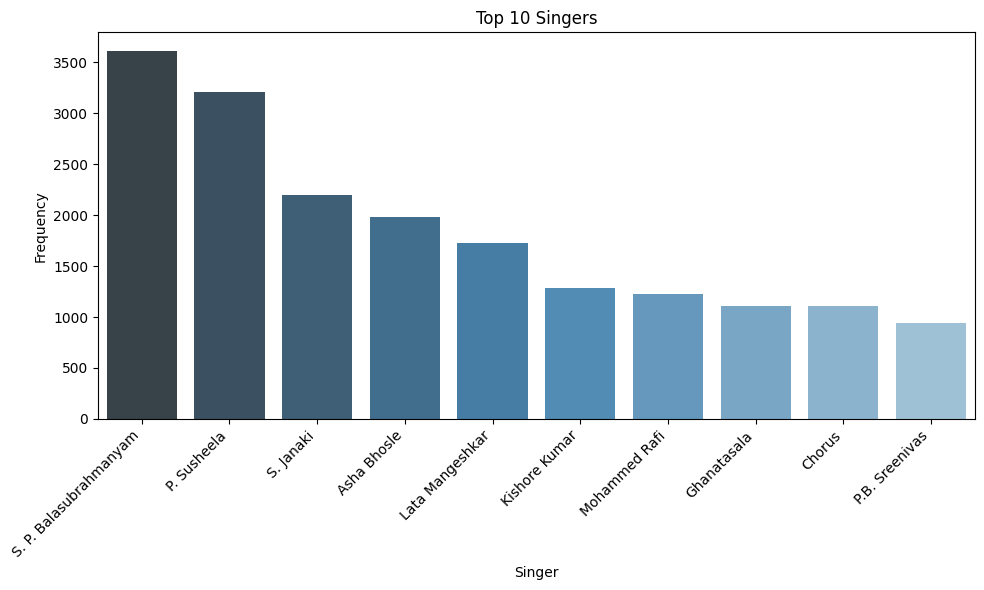

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

top_singers = top_singers.sort_values(by='freq', ascending=False)

palette = sns.color_palette("Blues_d", n_colors=len(top_singers))
palette = palette[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x='singer', y='freq', data=top_singers, palette=palette)
plt.xlabel("Singer")
plt.ylabel("Frequency")
plt.title("Top 10 Singers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* **Top 10 languages based on the frequency**

In [ ]:
data = []
for language in df['language'].unique():
  count = 0

  for i in df['language']:

    if language == i:
      count += 1

  data.append([language,count])

In [ ]:
df = pd.DataFrame(data, columns = ['language', 'freq'])

In [ ]:
df_pr = df.sort_values(by = 'freq',ascending = False).head()

* **Revieling the Top 5 languages for songs dataset**

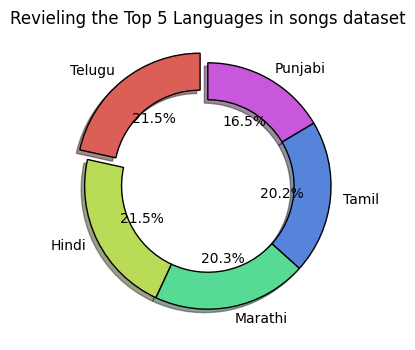

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

languages = df_pr['language']
frequencies = df_pr['freq']

palette = sns.color_palette("hls", len(languages))

explode = [0] * len(languages)
explode[frequencies.argmax()] = 0.1


plt.figure(figsize=(4, 4))
plt.pie(frequencies, labels=languages, autopct='%1.1f%%', startangle=90, colors=palette,
        explode=explode, shadow=True, wedgeprops=dict(width=0.3, edgecolor='black', linewidth=1))
plt.title("Revieling the Top 5 Languages in songs dataset")
plt.show()